In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline in the notebook
%matplotlib inline

# Setting up seaborn style
sns.set(style="whitegrid")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
file_path = 'E:/Data Science Project/Unified Mentor Project/Intership Project/Project 3_Data Visualization of Bird Strikes between 2000 – 2011/Bird Strikes.csv'
bird_strikes = pd.read_csv(file_path)

# Displaying the first few rows to understand the structure of the data
bird_strikes.head()


,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/2000 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/2001 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/2001 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/2002 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/2003 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [3]:
# Checking the structure and summary statistics of the dataset
print("Shape of the dataset:", bird_strikes.shape)
print("\nColumns in the dataset:")
print(bird_strikes.columns)

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(bird_strikes.describe())

# Checking for missing values
print("\nMissing values:")
print(bird_strikes.isnull().sum())

# Checking data types of columns
print("\nData types:")
print(bird_strikes.dtypes)


Shape of the dataset: (25558, 26)

Columns in the dataset:
Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

Summary statistics:
           Record ID  Wildlife: Number Struck Actual  Number of people injured
count   25558.000000                    25558.000000              25558.000000
mean   253916.085609                   

In [4]:
# Drop rows where essential columns like 'FlightDate' are missing
bird_strikes.dropna(subset=['FlightDate'], inplace=True)

# Convert 'FlightDate' to datetime format
bird_strikes['FlightDate'] = pd.to_datetime(bird_strikes['FlightDate'], errors='coerce')

# Convert numeric columns to appropriate data types
numeric_cols = ['Wildlife: Number struck', 'Cost: Total $', 'Feet above ground']
bird_strikes[numeric_cols] = bird_strikes[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert boolean columns to bool type
bool_cols = ['Remains of wildlife collected?', 'Remains of wildlife sent to Smithsonian', 'Is Aircraft Large?']
bird_strikes[bool_cols] = bird_strikes[bool_cols].astype(bool)

# Drop columns with excessive missing values or not relevant to current analysis
columns_to_drop = ['Effect: Impact to flight', 'Conditions: Precipitation', 'Remarks']
bird_strikes.drop(columns=columns_to_drop, inplace=True)

# Confirm changes
print("Updated data types:")
print(bird_strikes.dtypes)
print("\nMissing values after cleaning:")
print(bird_strikes.isnull().sum())


Updated data types:
Record ID                                           int64
Aircraft: Type                                     object
Airport: Name                                      object
Altitude bin                                       object
Aircraft: Make/Model                               object
Wildlife: Number struck                           float64
Wildlife: Number Struck Actual                      int64
FlightDate                                 datetime64[ns]
Effect: Indicated Damage                           object
Aircraft: Number of engines?                       object
Aircraft: Airline/Operator                         object
Origin State                                       object
When: Phase of flight                              object
Remains of wildlife collected?                       bool
Remains of wildlife sent to Smithsonian              bool
Wildlife: Size                                     object
Conditions: Sky                                    o

In [5]:
# Impute missing values for numeric columns
bird_strikes['Wildlife: Number struck'].fillna(bird_strikes['Wildlife: Number struck'].median(), inplace=True)
bird_strikes['Cost: Total $'].fillna(bird_strikes['Cost: Total $'].median(), inplace=True)
bird_strikes['Feet above ground'].fillna(bird_strikes['Feet above ground'].median(), inplace=True)

# Impute missing values for categorical/object columns
bird_strikes['Aircraft: Number of engines?'].fillna('Unknown', inplace=True)
bird_strikes['Origin State'].fillna('Unknown', inplace=True)

# Confirm missing values have been handled
print("Missing values after handling:")
print(bird_strikes.isnull().sum())


Missing values after handling:
Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above ground                          0
Number of people injured

In [6]:
# Assuming bird_strikes is your DataFrame
# Ensure FlightDate is in datetime format
bird_strikes['FlightDate'] = pd.to_datetime(bird_strikes['FlightDate'])

# Extract year from FlightDate for yearly analysis
bird_strikes['Year'] = bird_strikes['FlightDate'].dt.year


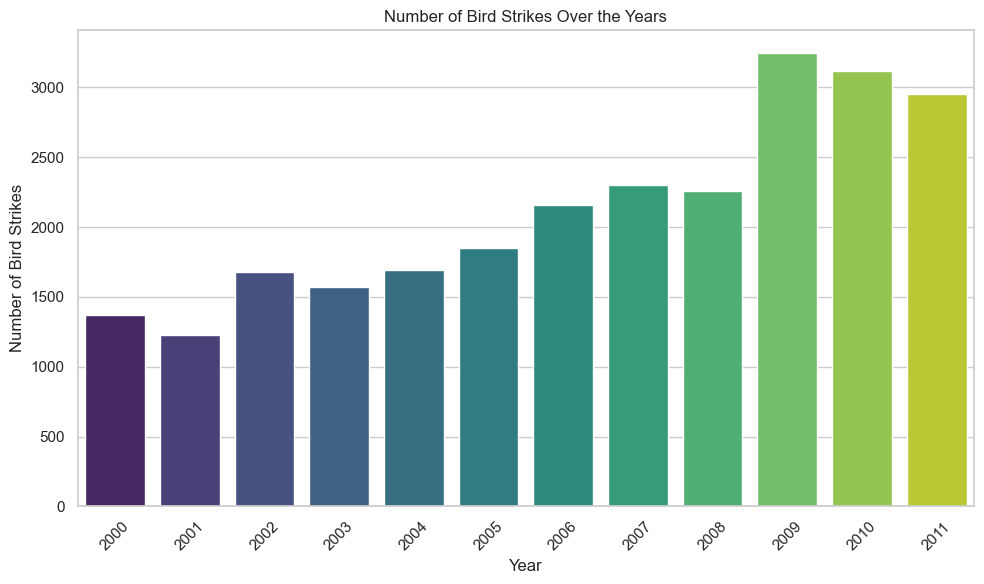

In [8]:
# Total number of bird strikes over the entire dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=bird_strikes, x='Year', palette='viridis')
plt.title('Number of Bird Strikes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

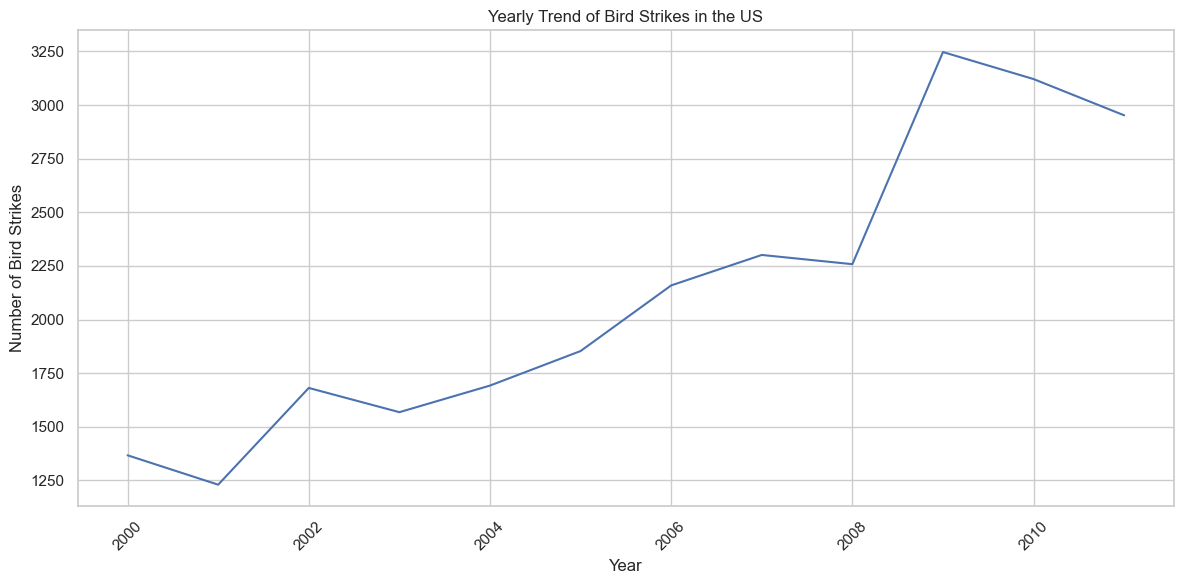

In [14]:
# Yearly trend of bird strikes in the US
plt.figure(figsize=(12, 6))
sns.lineplot(data=bird_strikes, x='Year', y=bird_strikes.index, estimator='count', ci=None, color='b')
plt.title('Yearly Trend of Bird Strikes in the US')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


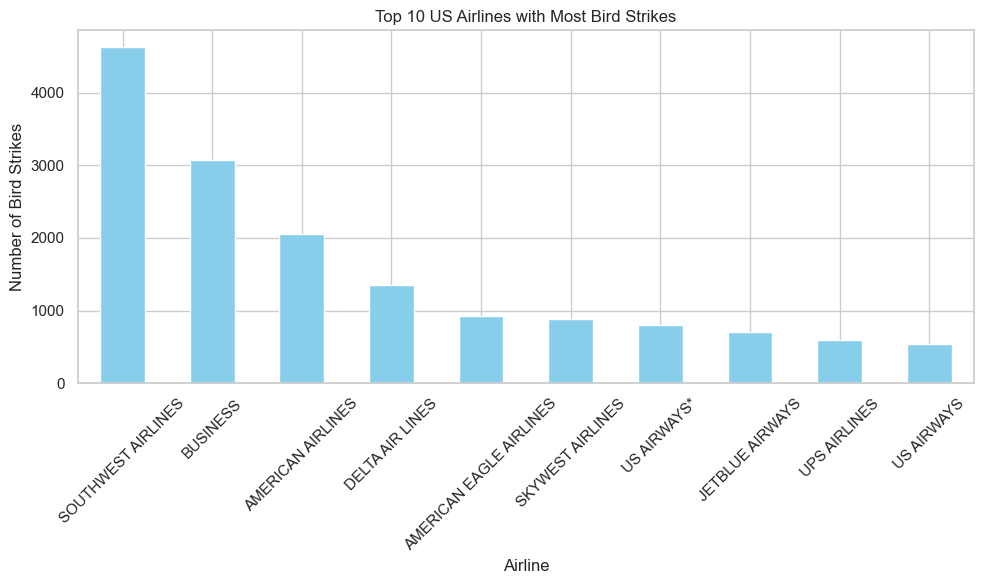

In [17]:
# Top 10 US Airlines with the highest number of bird strikes
top_airlines = bird_strikes['Aircraft: Airline/Operator'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_airlines.plot(kind='bar', color='skyblue')
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


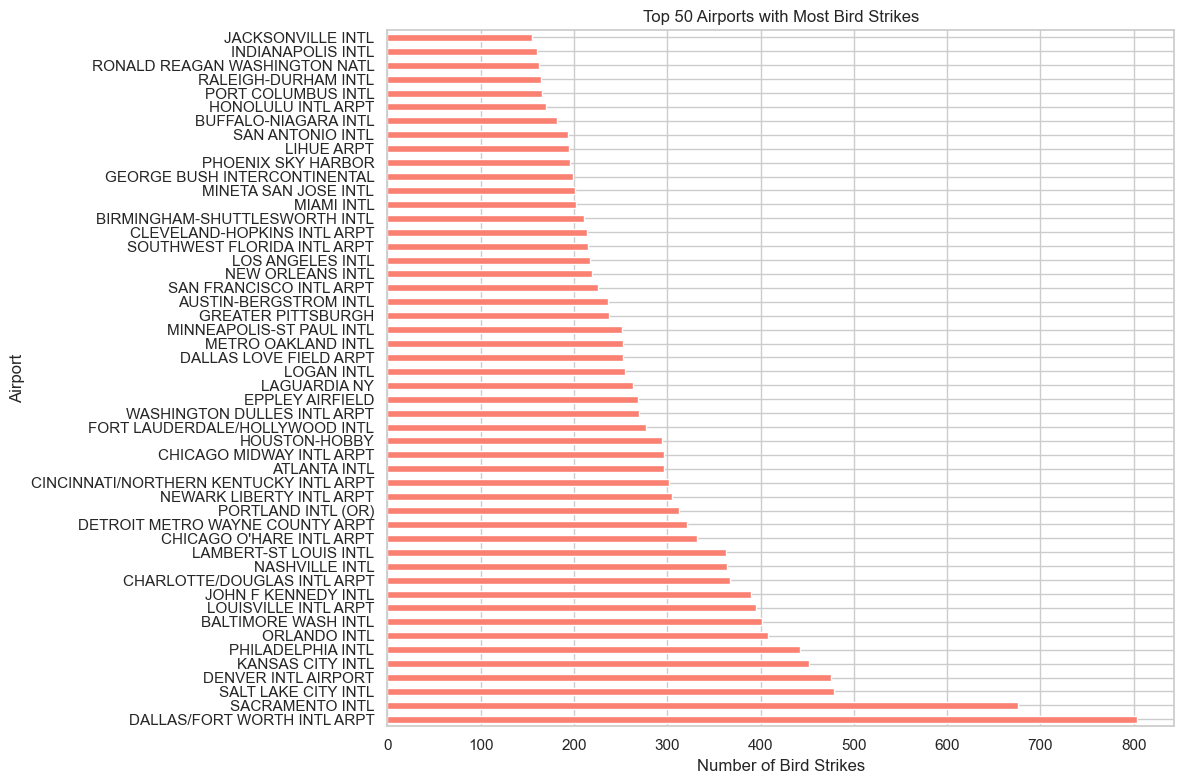

In [19]:
# Top 50 airports with the highest number of bird strikes
top_airports = bird_strikes['Airport: Name'].value_counts().head(50)

plt.figure(figsize=(12, 8))
top_airports.plot(kind='barh', color='salmon')
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport')
plt.tight_layout()
plt.show()


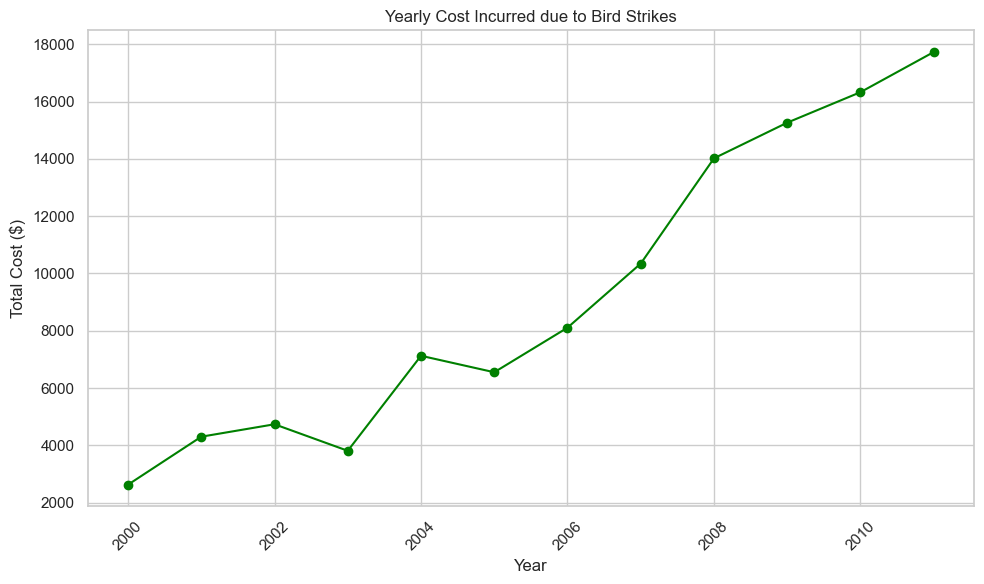

In [20]:
# Yearly cost incurred due to bird strikes (assuming Cost: Total $ is available)
yearly_cost = bird_strikes.groupby('Year')['Cost: Total $'].sum()

plt.figure(figsize=(10, 6))
yearly_cost.plot(kind='line', marker='o', color='green')
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


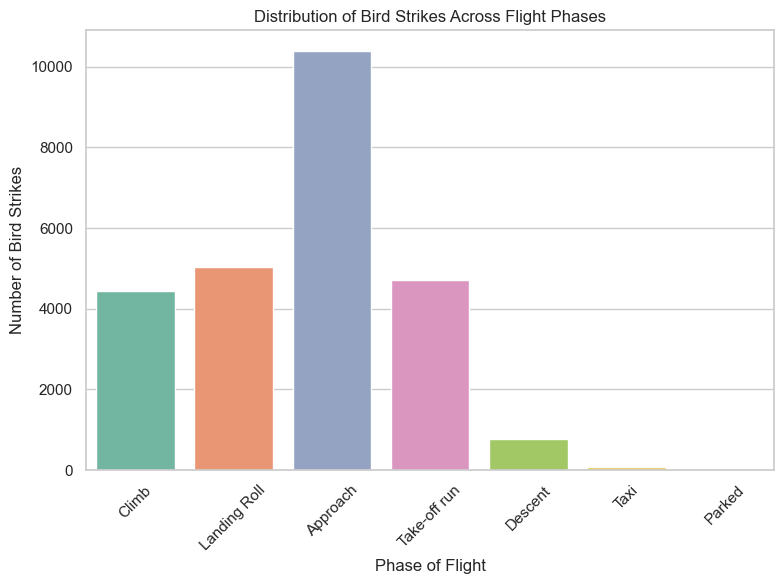

In [22]:
# Distribution of bird strikes across different phases of flight
plt.figure(figsize=(8, 6))
sns.countplot(data=bird_strikes, x='When: Phase of flight', palette='Set2')
plt.title('Distribution of Bird Strikes Across Flight Phases')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

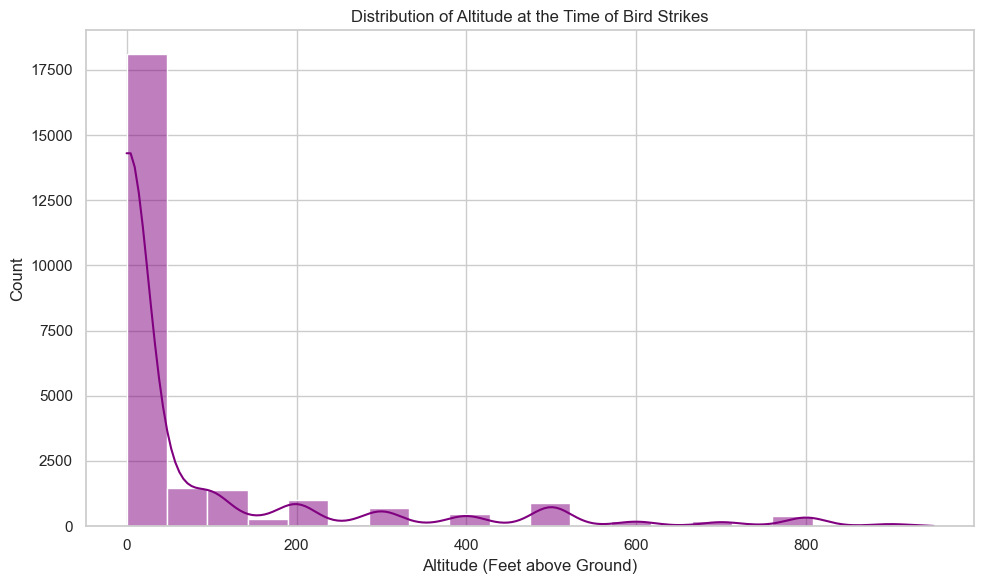

In [25]:
# Distribution of altitude of airplanes at the time of bird strikes
plt.figure(figsize=(10, 6))
sns.histplot(data=bird_strikes, x='Feet above ground', bins=20, kde=True, color='purple')
plt.title('Distribution of Altitude at the Time of Bird Strikes')
plt.xlabel('Altitude (Feet above Ground)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


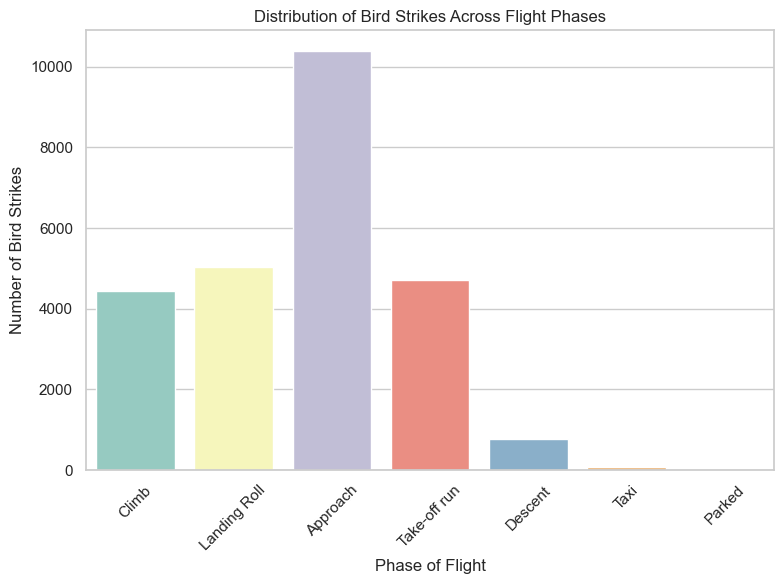

In [27]:
# Distribution of bird strikes across different phases of flight
plt.figure(figsize=(8, 6))
sns.countplot(data=bird_strikes, x='When: Phase of flight', palette='Set3')
plt.title('Distribution of Bird Strikes Across Flight Phases')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


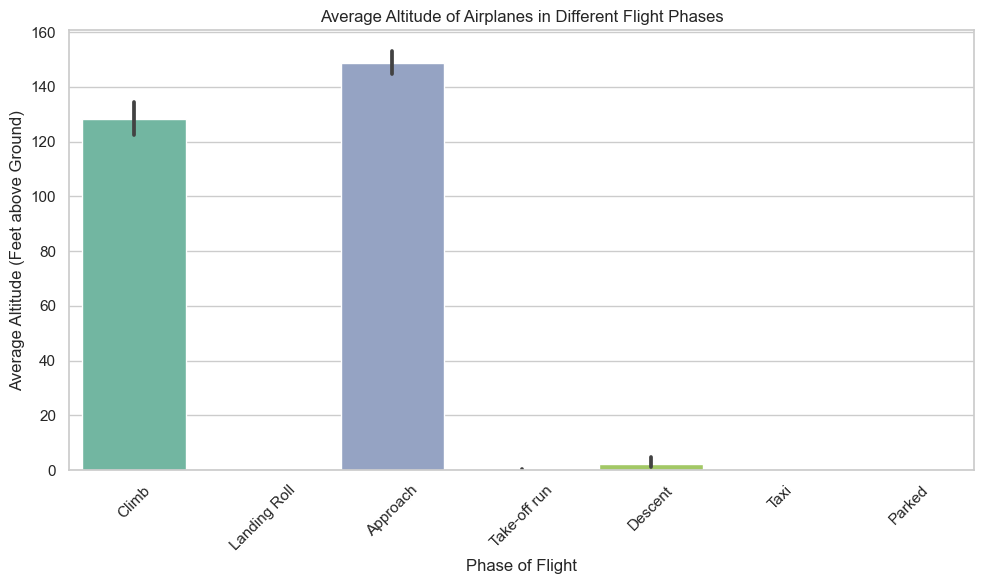

In [29]:
# Average altitude of airplanes in different phases at the time of bird strikes
plt.figure(figsize=(10, 6))
sns.barplot(data=bird_strikes, x='When: Phase of flight', y='Feet above ground', palette='Set2')
plt.title('Average Altitude of Airplanes in Different Flight Phases')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet above Ground)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


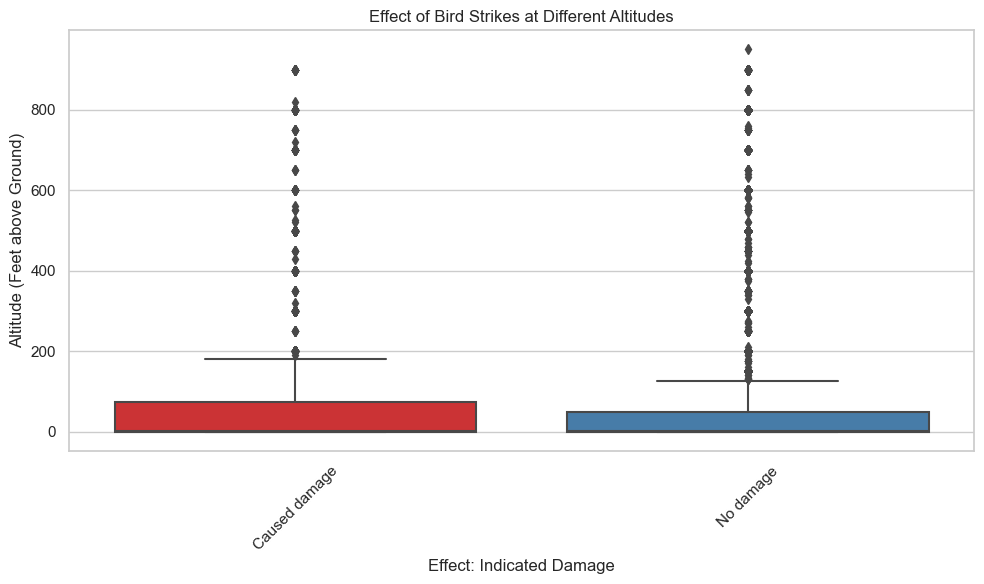

In [30]:
# Effect of bird strikes at different altitudes
plt.figure(figsize=(10, 6))
sns.boxplot(data=bird_strikes, x='Effect: Indicated Damage', y='Feet above ground', palette='Set1')
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Effect: Indicated Damage')
plt.ylabel('Altitude (Feet above Ground)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

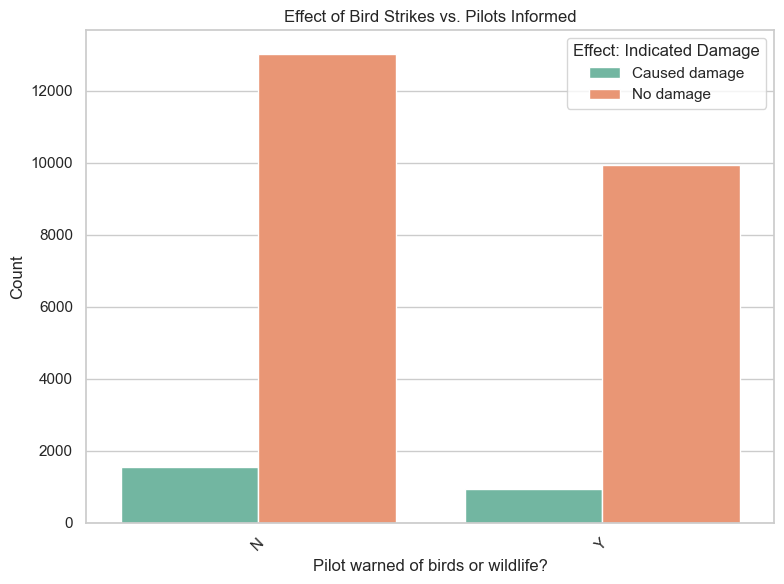

In [33]:
# Countplot to analyze if pilots were informed and the effect of bird strikes
plt.figure(figsize=(8, 6))
sns.countplot(data=bird_strikes, x='Pilot warned of birds or wildlife?', hue='Effect: Indicated Damage', palette='Set2')
plt.title('Effect of Bird Strikes vs. Pilots Informed')
plt.xlabel('Pilot warned of birds or wildlife?')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Effect: Indicated Damage')
plt.tight_layout()
plt.show()


In [35]:
# Export cleaned data to CSV file
output_path = 'E:/Data Science Project/Unified Mentor Project/Intership Project/Project 3_Data Visualization of Bird Strikes between 2000 – 2011/Bird Strikes_cleaned.csv'
bird_strikes.to_csv(output_path, index=False)